#Le jeu de la vie 

##Questions préliminaires:

Création de la chaine de caractères filename:

In [1]:
filename='hmma238_tp_selenaiskounen.ipynb'


Création de la variable taille_str:

In [2]:
taille_str=len(filename)
print(len(filename))

31


Création de la variable ma_graine:

In [3]:
ma_graine=taille_str//6
print(ma_graine)

5


##Implémentation sans numpy:

Définition de la fonction calcul_nb_voisins qui permet de calculer le nombre de cellule voisines de la cellule:

In [4]:
def calcul_nb_voisins(Z):
    forme = len(Z) , len(Z[0])
    N= [[0,]*(forme[0]) for i in range(forme[1])]
    for x in range(1,forme[0]-1):
       for y in range(1,forme[1]-1):
           N[x][y]=Z[x-1][y-1] + Z[x][y-1]+ Z[x+1][y-1] + Z[x-1][y] + 0  + Z[x+1][y] + Z[x-1][y+1] + Z[x][y+1] + Z[x+1][y+1]
    return N

Affichage de la liste Z, pour cela nous aurons besoin d'importer matplotlib.pyplot:

In [5]:
import matplotlib.pyplot as plt
from matplotlib import animation 
Z=[[0,0,0,0,0,0],
   [0,0,0,1,0,0],
   [0,1,0,1,0,0],
   [0,0,1,1,0,0],
   [0,0,0,0,0,0],
   [0,0,0,0,0,0]]
plt.imshow(Z)

Application de la fonction calcul_nb_voisins à la liste Z:

In [6]:
Z=[[0,0,0,0,0,0],
   [0,0,0,1,0,0],
   [0,1,0,1,0,0],
   [0,0,1,1,0,0],
   [0,0,0,0,0,0],
   [0,0,0,0,0,0]]
print(calcul_nb_voisins(Z))

[[0, 0, 0, 0, 0, 0], [0, 1, 3, 1, 2, 0], [0, 1, 5, 3, 3, 0], [0, 2, 3, 2, 2, 0], [0, 1, 2, 2, 1, 0], [0, 0, 0, 0, 0, 0]]


Definition de la fonction iteration_jeu qui permet de calculer le nombre de cellules voisines à la génération suivante:

In [7]:
def iteration_jeu(Z):
    forme=len(Z),len(Z[0])
    N=calcul_nb_voisins(Z)
    for x in range(1,forme[0]-1):
        for y in range(1,forme[1]-1):
            if Z[x][y]==1 and(N[x][y]<2 or N[x][y]>3):
                Z[x][y]=0 #mort de la cellule à la génération suivante par isolement ou par etoufement
            elif Z[x][y]==0 and N[x][y]==3:
                Z[x][y]=1 #naissance de la cellule à la génération suivante
    return Z

Application de la fonction iteration_jeu à la liste Z:

In [8]:
iteration_jeu(Z)


[[0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 1, 0],
 [0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

Definition d'une fonction qui permettera d'afficher les étapes pour 10 itérations.Pour la définition de cette focntion on utilisera une boucle for ainsi que la fonction imshow du package matplotlib afin d'afficher les sorties:

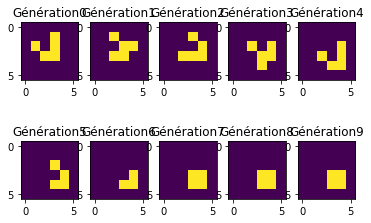

In [9]:
Z = [[0,0,0,0,0,0],
    [0,0,0,1,0,0],
    [0,1,0,1,0,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0]]
import  matplotlib.pyplot as plt
import numpy as np

for i in range (10):
        plt.subplot(2,5,i+1)
        Z=np.array(Z)
        plt.imshow(Z)
        Z=iteration_jeu(Z)
        plt.title("Génération" + str(i))


Les sorties obtenues indiquent bien que de l'itération 0 à 4, le nombre de cellules voisines à la génération suivante est différent.Cependant, la figure obtenue à la génération 4 est identique à celle de la génération 0 décallée d'une case vers le bas et une case vers la droite. Tandis qu'à partir de l'itération 7 ce nombre est constant en effet le schéma est stable à partir de cette itération. On peut donc conclure qu'à partir de la génération 7 il n'y a plus de naissance de nouvelle cellule ni de mort.

##Implémentation avec numpy:

In [10]:
import numpy as np
vect = np.array([0,1,0,0,1,1])
nb_vect = np.zeros(vect.shape)
nb_vect[1:-1] += (vect[:-2] + vect[2:])

print(vect)
print(nb_vect)

[0 1 0 0 1 1]
[0. 0. 1. 1. 1. 0.]


Definition de la fonction calcul_nb_voisins_np:

In [11]:
def calcul_nb_voisins_np(Z):
    Z=np.array(Z)
    nb_voisins_np=np.zeros(Z.shape)
    nb_voisins_np[1:-1,1:-1] +=Z[1:-1,:-2] + Z[:-2,:-2]+ Z[:-2,2:] + Z[2:,2:] + Z[2:,:-2] + Z[1:-1,2:] + Z[:-2,1:-1] + Z[2:,1:-1]
    return(nb_voisins_np)

Application de la fonction calcul_nb_voisins_np à la matrice Z:

In [12]:
Z = [[0,0,0,0,0,0],
    [0,0,0,1,0,0],
    [0,1,0,1,0,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0]]

print(calcul_nb_voisins_np(Z))

[[0. 0. 0. 0. 0. 0.]
 [0. 1. 3. 1. 2. 0.]
 [0. 1. 5. 3. 3. 0.]
 [0. 2. 3. 2. 2. 0.]
 [0. 1. 2. 2. 1. 0.]
 [0. 0. 0. 0. 0. 0.]]


On remarque que le résultat obtenu est identique à celui obtenu sans numpy.

Définition de la fonction  iteration_jeu_np:

In [13]:
def iteration_jeu_np(Z):
    forme=len(Z),len(Z[0])
    Z=np.array(Z) # on reprend le même code que précédement avec comme Z une matrice 
    N=calcul_nb_voisins_np(Z) # le nombre de cellule voisines défini précédement pour Z array
    for x in range(1,forme[0]-1):
        for y in range(1,forme[1]-1):
            if Z[x][y]==1 and(N[x][y]<2 or N[x][y]>3):
                Z[x][y]=0 
            elif Z[x][y]==0 and N[x][y]==3:
                Z[x][y]=1 
    return Z

Application de la fonction iteration_jeu_np à Z:

In [14]:
print(iteration_jeu_np(Z))

[[0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 1 0]
 [0 0 1 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


On obtient bien le même résultat que lors de l'implémentation sans numpy.

Définition de la fonction jeu_np:

In [15]:
def jeu_np(Z_in,nb_iter):
    Z_in=np.array(Z_in)
    for i in range(nb_iter):
        Z_in=iteration_jeu_np(Z_in)
        return(Z_in)
        

Application de la fonction jeu_np à Z_in=Z et nb_iter=10:

[[0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 1 0]
 [0 0 1 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


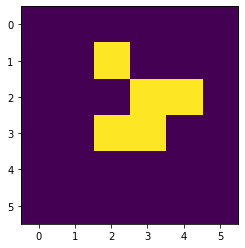

In [16]:
print(jeu_np(Z,10))
plt.imshow(jeu_np(Z,10))

On retrouve bien l'itération 10 obtenue lors de l'implémentation sans numpy.

Affichage du film qui représente les itérations du jeu de la vie pour la matrice Z_huge:

In [17]:
Z_huge = np.zeros((100, 100))
Z_np = np.array(
[[0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0],
[0, 1, 0, 1, 0, 0],
[0, 0, 1, 1, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0]])
Z_huge[10:16, 10:16] = Z_np

Définition d'une fonction move_it qui permet d'afficher le film représentant les itérations du jeu  pour une initialisation par la matrice Z_huge:

<IPython.core.display.Javascript object>


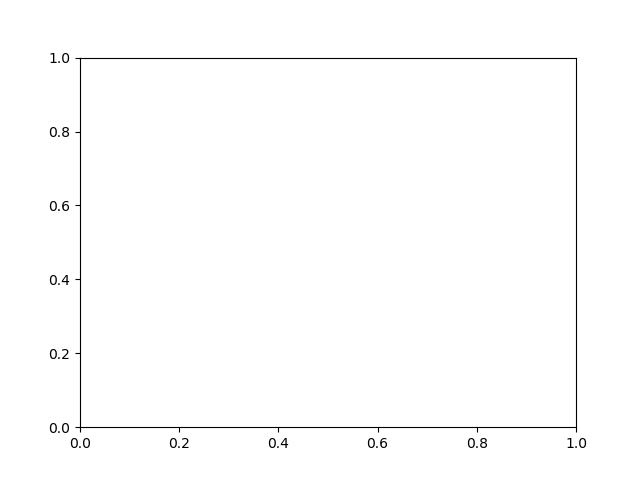

In [18]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots()

def move_it(Z,nb_iter):
    Z=np.array(Z)
    for i in range(nb_iter):
        Z=jeu_np(Z,i)
        return (Z)

film = FuncAnimation(fig, move_it(Z_np,10), frames=50, blit=True)
plt.show()